<a href="https://colab.research.google.com/github/ishika-b/neural-networks/blob/main/nnfl_assn2_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score
import random
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from sklearn.preprocessing import normalize

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def relu(z):
  return np.maximum(z,1e-5)
def sigmoid_backward(dA,A):
  return dA * sig * (1 - sig)

In [ ]:
def train(layers_dims, iters, alpha, x_train,y_train):
  #INITIALISE
  costs = []
  w1 = np.random.randn(layers_dims[1],layers_dims[0])*0.005
  b1 = np.zeros((layers_dims[1],1))
  w2= np.random.randn(layers_dims[2],layers_dims[1])*0.005
  b2 = np.zeros((layers_dims[2],1))
  w3 = np.random.randn(layers_dims[3],layers_dims[2])*0.005
  b3 = np.zeros((layers_dims[3],1))

  for i in range(iters):
    cost = 0
    dJw1=0
    dJw2=0
    dJw3=0
    dJb1=0
    dJb2=0
    dJb3=0
    for j in range(m):
      #FORWARDPROP
      x_ = x_train[j,:].reshape(72,1)
      z1 = np.dot(w1,x_)+b1
      a1 = relu(z1)
      z2 = np.dot(w2,a1)+b2
      a2 = relu(z2)
      z3 = np.dot(w3,a2)+b3
      a3 = sigmoid(z3)
      cost += np.squeeze((y_train[j][0]-a3)**2)
      #BACKPROP
      dz3 = (a3)*(1-a3.T)*(a3-y_train[j][0])
      dJw3 += np.dot(dz3,a2.T)
      dJb3 += dz3
      da2 = np.dot(w3.T,dz3)
      dz2 = np.multiply(da2,np.heaviside(z2,1e-5))
      dJw2 += np.dot(dz2,a1.T)
      dJb2 += dz2
      da1 = np.dot(w2.T,dz2)
      dz1 = np.multiply(da1,np.heaviside(z1,1e-5))
      dJw1 += np.dot(dz1,x_.T)
      dJb1 += dz1
    costs.append(cost/m)

    #WEIGHT UPDATE
    w1 = w1 - alpha*dJw1
    w2 = w2 - alpha*dJw2
    w3 = w3 - alpha*dJw3
    b1 = b1 - alpha*dJb1
    b2 = b2 - alpha*dJb2
    b3 = b3 - alpha*dJb3
  return w1,w2,w3,b1,b2,b3,costs

In [ ]:
if __name__ == '__main__':
  mat_data = loadmat('/content/drive/My Drive/nnfl/nnfl2/data5.mat')
  data = mat_data['x'] #numpy array
  
  np.random.seed(2)
  np.random.shuffle(data) #shuffling row wise to get a 2148x73 np array

  x = data[:,:-1]
  y = data[:,-1]
  #print(np.unique(y)) 2 class levels : 1 , 0

  #normalize
  means = np.mean(x,axis = 0)
  std_devs = np.std(x,axis = 0)
  x = (x - means)/std_devs
  
  y = y.reshape(x.shape[0],1)

HOLD-OUT CROSS VALIDATION

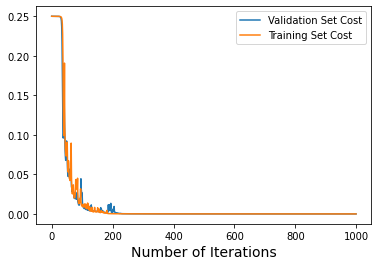

In [ ]:
  #Split data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=1)

  m,n = x_train.shape

  iters = 1000
  alpha = 0.008
  layers_dims = [n,50,50,1] 

  w1, w2, w3, b1, b2, b3, costs_tr = train(layers_dims, iters, alpha, x_train, y_train)
  w1, w2, w3, b1, b2, b3, costs_val = train(layers_dims, iters, alpha, x_train, y_train)
 
  fig = plt.figure()
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(0,1000),costs_val, label = 'Validation Set Cost')
  plt.plot(range(0,1000),costs_tr, label = 'Training Set Cost')
  plt.legend()

  y_pred = np.zeros(x_test.shape[0])
  acc = 0
  for j in range(x_test.shape[0]):
    x_ = x_test[j,:].reshape(72,1)
    z1 = np.dot(w1,x_)+b1
    a1 = relu(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = relu(z2)
    z3 = np.dot(w3,a2)+b3
    a3 = sigmoid(z3)
    y_pred[j] = np.round(a3)

In [ ]:
acc = accuracy_score(y_test,y_pred)
print("overall accuracy:",acc)

overall accuracy: 0.9488372093023256


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("class 0 accuracy:", cm[0,0]/(cm[0,0]+cm[0,1]))
print("class 1 accuracy:",cm[1,1]/(cm[1,1]+cm[1,0]))

class 0 accuracy: 0.9615384615384616
class 1 accuracy: 0.9336734693877551


5-FOLD CROSS VALIDATION 

overall accuracy in  1  : 0.958139534883721
class 0 accuracy in  1  : 0.9487179487179487
class 1 accuracy in  1  : 0.9659574468085106
overall accuracy in  2  : 0.9697674418604652
class 0 accuracy in  2  : 0.9641255605381166
class 1 accuracy in  2  : 0.9758454106280193
overall accuracy in  3  : 0.9534883720930233
class 0 accuracy in  3  : 0.9593908629441624
class 1 accuracy in  3  : 0.9484978540772532
overall accuracy in  4  : 0.9696969696969697
class 0 accuracy in  4  : 0.986784140969163
class 1 accuracy in  4  : 0.9504950495049505
overall accuracy in  5  : 0.9766899766899767
class 0 accuracy in  5  : 0.9742489270386266
class 1 accuracy in  5  : 0.9795918367346939


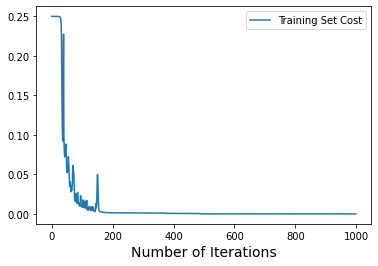

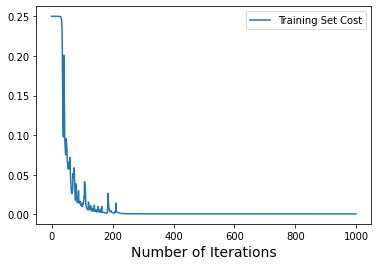

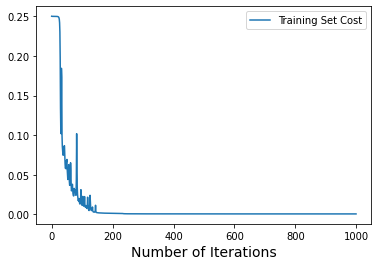

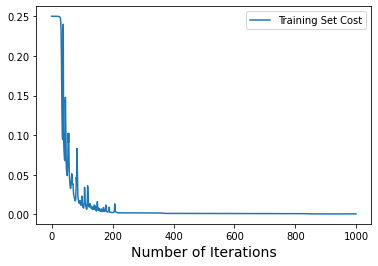

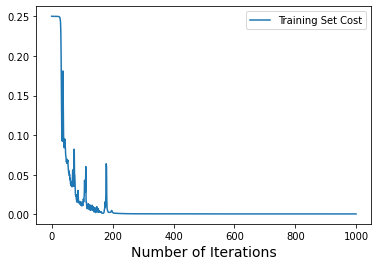

In [ ]:
  from sklearn.metrics import confusion_matrix
  from sklearn.model_selection import KFold

  acc_vector = []
  class_zero_acc = []
  class_one_acc = []

  cf = KFold(n_splits=5, shuffle=True)
  fold = 1 
  for train_index, test_index in cf.split(x):
      #print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]

      m,n = x_train.shape

      iters = 1000
      alpha = 0.008
      layers_dims = [n,50,50,1] 

      w1, w2, w3, b1, b2, b3, costs_tr = train(layers_dims, iters, alpha, x_train, y_train)
    
      fig = plt.figure()
      plt.xlabel('Number of Iterations', fontsize=14)
      plt.plot(range(0,1000),costs_tr, label = 'Training Set Cost')
      plt.legend()

      y_pred = np.zeros(x_test.shape[0])
      acc = 0
      for j in range(x_test.shape[0]):
        x_ = x_test[j,:].reshape(72,1)
        z1 = np.dot(w1,x_)+b1
        a1 = relu(z1)
        z2 = np.dot(w2,a1)+b2
        a2 = relu(z2)
        z3 = np.dot(w3,a2)+b3
        a3 = sigmoid(z3)
        y_pred[j] = np.round(a3)
        
      score = accuracy_score(y_test, y_pred)
      print("overall accuracy in ", fold," :",score.mean())
      acc_vector.append(score.mean())

      cm = confusion_matrix(y_test, y_pred)
      print("class 0 accuracy in ", fold," :", cm[0,0]/(cm[0,0]+cm[0,1]))
      class_zero_acc.append(cm[0,0]/(cm[0,0]+cm[0,1]))
      print("class 1 accuracy in ", fold," :", cm[1,1]/(cm[1,1]+cm[1,0]))
      class_one_acc.append(cm[1,1]/(cm[1,1]+cm[1,0]))

      fold = fold + 1

In [ ]:
from statistics import mean 
print("average overall accuracy", mean(acc_vector))
print("average class 0 accuracy", mean(class_zero_acc))
print("average class 1 accuracy", mean(class_one_acc))

average overall accuracy 0.9655564590448311
average class 0 accuracy 0.9666534880416034
average class 1 accuracy 0.9640775195506854
